In [5]:
import numpy as np
import math
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
def read_input(filename):
    input_data=[];
    f=open(filename);
    for line in f:
        input_data.append(line.split());
    return input_data;

def create_feature_matrix(input_data):
    x_list=[a[0:len(input_data[0])-1] for a in input_data];
    x=np.matrix(x_list);
    #x=np.transpose(x)
    return x.astype(np.float);

def create_y_matrix(input_data):
    y_list=[a[len(input_data[0])-1] for a in input_data];
    y=np.matrix(y_list);
    y=np.transpose(y)
    return y.astype(np.float);

def plot_graph(data_x, data_y, predicted_y, inp):
    plt.plot(data_x, data_y,'+');
    if(inp==False):
        plt.plot(data_x, predicted_y,'.');
    plt.xlabel("X Label");
    plt.ylabel("Y Label")
    plt.show();



In [59]:
def plot_input_data(filename):
    input_data=read_input(filename)
    data_x=create_feature_matrix(input_data)
    data_y=create_y_matrix(input_data)
    plot_graph( data_x, data_y,[], True);

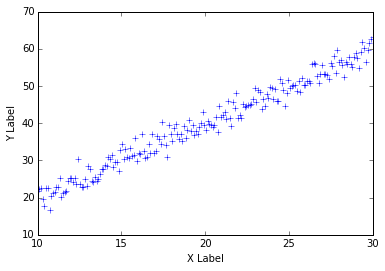

In [60]:
plot_input_data("svar-set1.dat")

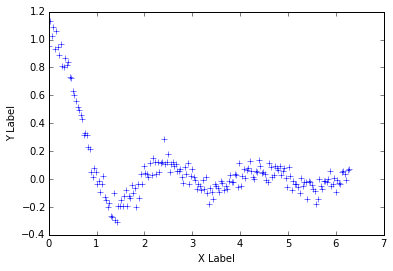

In [61]:
plot_input_data("svar-set2.dat")

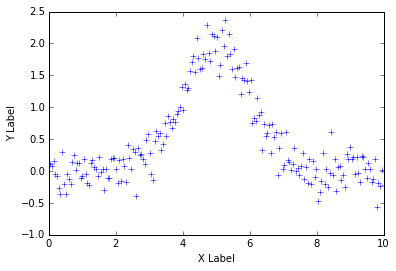

In [62]:
plot_input_data("svar-set3.dat")

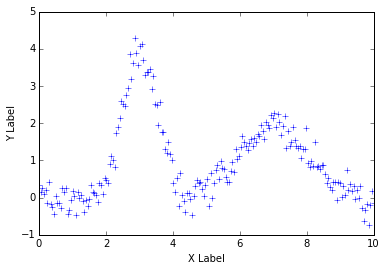

In [63]:
plot_input_data("svar-set4.dat")

In [64]:
def poly_model(training_data_x, training_data_y, poly_degree):
    z=np.ones((training_data_x.shape[0],1));
    poly_matrix=np.empty([training_data_x.shape[0], poly_degree]);
    for i in range(training_data_x.shape[0]):
        for j in range( poly_degree):
            for k in range(training_data_x.shape[1]):
                poly_matrix[i][j]=(training_data_x[i][k])**(j+1);
    Z=np.concatenate((z,poly_matrix), axis=1);
    #print Z
    theta=np.dot(np.linalg.pinv(Z), training_data_y);
    return theta;

def predict(testing_data_x, theta, degree):
    poly = PolynomialFeatures(degree);
    Z=poly.fit_transform(testing_data_x);
    predicted_y=np.dot(Z, theta);
    return predicted_y;

def relative_mean_square(predicted_y, training_data_y):
    difference_y_num=np.empty([predicted_y.shape[0], predicted_y.shape[1]]);
    difference_y_deno=np.empty([predicted_y.shape[0], predicted_y.shape[1]]);
    difference_y=np.empty([predicted_y.shape[0], predicted_y.shape[1]]);
    for i in range(predicted_y.shape[0]):
        for j in range(predicted_y.shape[1]):
            difference_y_num[i][j]=predicted_y[i][j]-training_data_y[i][j];
            difference_y_num[i][j]=(difference_y_num[i][j]*difference_y_num[i][j])
            difference_y_deno[i][j]=training_data_y[i][j]-np.mean(training_data_y);
            difference_y_deno[i][j]=(difference_y_deno[i][j]*difference_y_deno[i][j])
            difference_y[i][j]=difference_y_num[i][j]/difference_y_deno[i][j]
    difference_y=difference_y.sum()
    RMS=(difference_y)/len(predicted_y);
    return RMS;
    
def do_cross_validation(data_x, data_y,degree,  n_folds=10):
    cv = KFold(len(data_y), n_folds, shuffle=True, random_state=5)
    error_mean_custom = []
    error_mean_python = []
    error_mean_train = []
    i=1;
    for train_idx, test_idx in cv:
        theta=poly_model(data_x[train_idx], data_y[train_idx], degree);
        predicted_y_train=predict(data_x[train_idx], theta, degree)
        RMS_custom_train=relative_mean_square(predicted_y_train, data_y[train_idx]);
        print
        print "Training error For fold: %d RMS (relative mean sequare error) = %f" %(i, RMS_custom_train)
        error_mean_train.append(RMS_custom_train);
        print 
        
        #print "(Custom Model) For fold: %d theta = " %i
        #print theta
        poly=PolynomialFeatures(degree);
        X_train=poly.fit_transform(data_x[train_idx])
        clf=LinearRegression();
        clf.fit(X_train, data_y[train_idx])
        X_test=poly.fit_transform(data_x[test_idx])
        predicted_y_python=clf.predict(X_test)

        #print "(Python Model) For fold: %d theta =" %i
        #print clf.intercept_, clf.coef_
        predicted_y_custom=predict(data_x[test_idx], theta, degree)
        RMS_custom=relative_mean_square(predicted_y_custom, data_y[test_idx]);
        RMS_python=relative_mean_square(predicted_y_python, data_y[test_idx]);
        print "(Custom Model) For fold: %d RMS = %f" %(i, RMS_custom)
        print "(Python Model) For fold: %d RMS = %f" %(i, RMS_python)
        error_mean_custom.append(RMS_custom);
        error_mean_python.append(RMS_python);
        error_mean_train.append(RMS_custom_train);
        i=i+1;
    avg_custom=np.mean(error_mean_custom);
    avg_python=np.mean(error_mean_python);
    avg_train=np.mean(error_mean_train);
    return avg_custom, avg_python, avg_train;




In [65]:
def run_poly_regression_single(filename, fold, degree):
    input_data=read_input(filename)
    data_x=create_feature_matrix(input_data)
    data_y=create_y_matrix(input_data)
    poly=PolynomialFeatures(degree);
    avg_custom, avg_python, avg_train=do_cross_validation(data_x, data_y, degree, fold)
    print 
    print "Training Error Average RMS (relative mean square error): %f " %(avg_train)
    print 
    print "(Custom & Python Model) Average RMS: %f , %f" %(avg_custom, avg_python)
    theta=poly_model(data_x, data_y, degree)
    predicted_y=predict(data_x, theta, degree);
    plot_graph( data_x, data_y, predicted_y, False);


Training error For fold: 1 RMS (relative mean sequare error) = 3157.390328

(Custom Model) For fold: 1 RMS = 0.223130
(Python Model) For fold: 1 RMS = 0.223130

Training error For fold: 2 RMS (relative mean sequare error) = 5.510167

(Custom Model) For fold: 2 RMS = 173.033193
(Python Model) For fold: 2 RMS = 173.033193

Training error For fold: 3 RMS (relative mean sequare error) = 7.259677

(Custom Model) For fold: 3 RMS = 3.224632
(Python Model) For fold: 3 RMS = 3.224632

Training error For fold: 4 RMS (relative mean sequare error) = 29.716888

(Custom Model) For fold: 4 RMS = 12.548529
(Python Model) For fold: 4 RMS = 12.548529

Training error For fold: 5 RMS (relative mean sequare error) = 2.804180

(Custom Model) For fold: 5 RMS = 0.244195
(Python Model) For fold: 5 RMS = 0.244195

Training error For fold: 6 RMS (relative mean sequare error) = 389.720555

(Custom Model) For fold: 6 RMS = 0.144646
(Python Model) For fold: 6 RMS = 0.144646

Training error For fold: 7 RMS (relativ

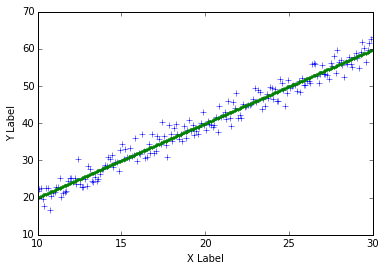

In [66]:
run_poly_regression_single("svar-set1.dat", 10, 2)


Training error For fold: 1 RMS (relative mean sequare error) = 90.760142

(Custom Model) For fold: 1 RMS = 2.714381
(Python Model) For fold: 1 RMS = 2.714381

Training error For fold: 2 RMS (relative mean sequare error) = 76.535379

(Custom Model) For fold: 2 RMS = 38.171338
(Python Model) For fold: 2 RMS = 38.171338

Training error For fold: 3 RMS (relative mean sequare error) = 421.271698

(Custom Model) For fold: 3 RMS = 7.014727
(Python Model) For fold: 3 RMS = 7.014727

Training error For fold: 4 RMS (relative mean sequare error) = 32.090885

(Custom Model) For fold: 4 RMS = 7.096228
(Python Model) For fold: 4 RMS = 7.096228

Training error For fold: 5 RMS (relative mean sequare error) = 1755.547970

(Custom Model) For fold: 5 RMS = 1.568120
(Python Model) For fold: 5 RMS = 1.568120

Training error For fold: 6 RMS (relative mean sequare error) = 232.172530

(Custom Model) For fold: 6 RMS = 6.924699
(Python Model) For fold: 6 RMS = 6.924699

Training error For fold: 7 RMS (relativ

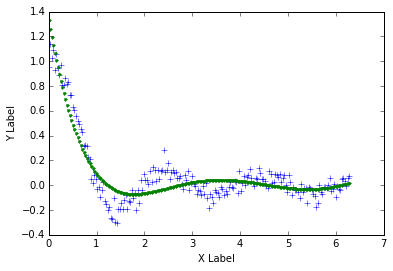

In [68]:
run_poly_regression_single("svar-set2.dat", 10, 5)


Training error For fold: 1 RMS (relative mean sequare error) = 2.334777

(Custom Model) For fold: 1 RMS = 2.628077
(Python Model) For fold: 1 RMS = 2.628077

Training error For fold: 2 RMS (relative mean sequare error) = 5.043522

(Custom Model) For fold: 2 RMS = 3.409218
(Python Model) For fold: 2 RMS = 3.409218

Training error For fold: 3 RMS (relative mean sequare error) = 735.016878

(Custom Model) For fold: 3 RMS = 2.168139
(Python Model) For fold: 3 RMS = 2.168139

Training error For fold: 4 RMS (relative mean sequare error) = 2.695464

(Custom Model) For fold: 4 RMS = 1.750627
(Python Model) For fold: 4 RMS = 1.750627

Training error For fold: 5 RMS (relative mean sequare error) = 2.763402

(Custom Model) For fold: 5 RMS = 1.145662
(Python Model) For fold: 5 RMS = 1.145662

Training error For fold: 6 RMS (relative mean sequare error) = 1.365551

(Custom Model) For fold: 6 RMS = 10451.289954
(Python Model) For fold: 6 RMS = 10451.289955

Training error For fold: 7 RMS (relative 

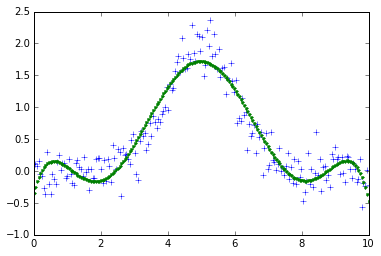

In [50]:
run_poly_regression_single("svar-set3.dat", 10, 6)


Training error For fold: 1 RMS (relative mean sequare error) = 18.315064

(Custom Model) For fold: 1 RMS = 1.587907
(Python Model) For fold: 1 RMS = 1.587907

Training error For fold: 2 RMS (relative mean sequare error) = 117467.931781

(Custom Model) For fold: 2 RMS = 348.309728
(Python Model) For fold: 2 RMS = 348.309728

Training error For fold: 3 RMS (relative mean sequare error) = 173.635068

(Custom Model) For fold: 3 RMS = 1.564841
(Python Model) For fold: 3 RMS = 1.564841

Training error For fold: 4 RMS (relative mean sequare error) = 20.811956

(Custom Model) For fold: 4 RMS = 1.162149
(Python Model) For fold: 4 RMS = 1.162149

Training error For fold: 5 RMS (relative mean sequare error) = 737.207329

(Custom Model) For fold: 5 RMS = 2.930264
(Python Model) For fold: 5 RMS = 2.930264

Training error For fold: 6 RMS (relative mean sequare error) = 45.981343

(Custom Model) For fold: 6 RMS = 2.767537
(Python Model) For fold: 6 RMS = 2.767537

Training error For fold: 7 RMS (rel

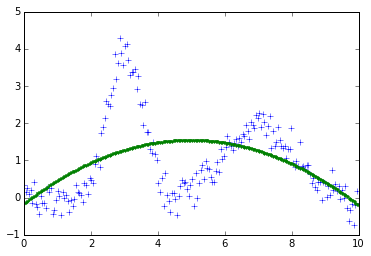

In [46]:
run_poly_regression_single("svar-set4.dat", 10, 2)

For 2 folds: 

Training error For fold: 1 RMS (relative mean sequare error) = 13.816221

(Custom Model) For fold: 1 RMS = 2311.523767
(Python Model) For fold: 1 RMS = 2311.523761

Training error For fold: 2 RMS (relative mean sequare error) = 2012.678771

(Custom Model) For fold: 2 RMS = 10.961519
(Python Model) For fold: 2 RMS = 10.961519

Training Error Average RMS (relative mean square error): 1013.247496 

(Custom & Python Model) Average RMS: 1161.242643 , 1161.242640


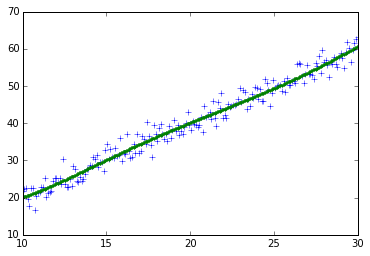

For 5 folds: 

Training error For fold: 1 RMS (relative mean sequare error) = 9.745252

(Custom Model) For fold: 1 RMS = 0.059427
(Python Model) For fold: 1 RMS = 0.059427

Training error For fold: 2 RMS (relative mean sequare error) = 20.150580

(Custom Model) For fold: 2 RMS = 0.300069
(Python Model) For fold: 2 RMS = 0.300069

Training error For fold: 3 RMS (relative mean sequare error) = 2.436642

(Custom Model) For fold: 3 RMS = 53.522278
(Python Model) For fold: 3 RMS = 53.522278

Training error For fold: 4 RMS (relative mean sequare error) = 9.594426

(Custom Model) For fold: 4 RMS = 5.382995
(Python Model) For fold: 4 RMS = 5.382994

Training error For fold: 5 RMS (relative mean sequare error) = 4.225941

(Custom Model) For fold: 5 RMS = 35.368105
(Python Model) For fold: 5 RMS = 35.368104

Training Error Average RMS (relative mean square error): 9.230569 

(Custom & Python Model) Average RMS: 18.926575 , 18.926575


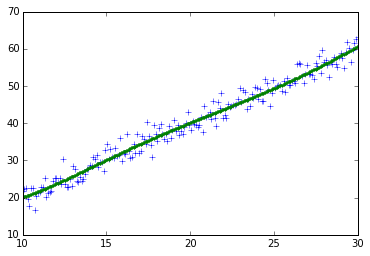

For 8 folds: 

Training error For fold: 1 RMS (relative mean sequare error) = 2.358815

(Custom Model) For fold: 1 RMS = 0.054880
(Python Model) For fold: 1 RMS = 0.054880

Training error For fold: 2 RMS (relative mean sequare error) = 39.391737

(Custom Model) For fold: 2 RMS = 0.066276
(Python Model) For fold: 2 RMS = 0.066276

Training error For fold: 3 RMS (relative mean sequare error) = 49527.389648

(Custom Model) For fold: 3 RMS = 0.324903
(Python Model) For fold: 3 RMS = 0.324903

Training error For fold: 4 RMS (relative mean sequare error) = 1.423147

(Custom Model) For fold: 4 RMS = 63.795882
(Python Model) For fold: 4 RMS = 63.795882

Training error For fold: 5 RMS (relative mean sequare error) = 43.244491

(Custom Model) For fold: 5 RMS = 0.100682
(Python Model) For fold: 5 RMS = 0.100682

Training error For fold: 6 RMS (relative mean sequare error) = 6.587174

(Custom Model) For fold: 6 RMS = 6.575118
(Python Model) For fold: 6 RMS = 6.575118

Training error For fold: 7 RM

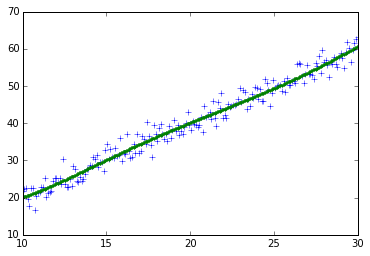

In [34]:
print "For 2 folds: "
run_poly_regression_single("svar-set1.dat", 2, 5)
print "For 5 folds: "
run_poly_regression_single("svar-set1.dat", 5, 5)
print "For 8 folds: "
run_poly_regression_single("svar-set1.dat", 8, 5)

In [ ]:
print "For 2 folds: "
run_poly_regression_single("svar-set2.dat", 2, 5)
print "For 5 folds: "
run_poly_regression_single("svar-set2.dat", 5, 5)
print "For 8 folds: "
run_poly_regression_single("svar-set2.dat", 8, 5)

In [ ]:
print "For 2 folds: "
run_poly_regression_single("svar-set3.dat", 2, 5)
print "For 5 folds: "
run_poly_regression_single("svar-set3.dat", 5, 5)
print "For 8 folds: "
run_poly_regression_single("svar-set3.dat", 8, 5)

In [ ]:
print "For 2 folds: "
run_poly_regression_single("svar-set4.dat", 2, 5)
print "For 5 folds: "
run_poly_regression_single("svar-set4.dat", 5, 5)
print "For 8 folds: "
run_poly_regression_single("svar-set4.dat", 8, 5)